In [2]:
%pylab inline
import numpy as np
import pandas as pd
import datetime
print datetime.datetime.now()

Populating the interactive namespace from numpy and matplotlib
2015-11-15 14:52:27.563923


CL_seed= Initial CL given by checkmate taking as base a point with CL_theoretical=0.95 $$ $$
CL_ckm = Final CL given by checkmate, which is equal to CL_seed if, abs(CL_seed-CL_ckm)< 0.01 $$ $$
CL_theo = Theoretical CL for the final y_eN and Y_muN

In [3]:
columns=['CL_ckm_ini', 'CL_ckm_fin','y1', 'y2', 'y_elN_orig','y_muN_orig','CL_comb_th_ckm(y_elN,y_muN,520)[0]',\
'y_elN',  'y_muN', 'y_tauR','CL_comb_th_ckm(YeN,YmuN,520)[0]','CL_comb_th_ckm(YeN,YmuN,520)[1]',\
                            'CL_chekm_combf','dCL_checkm_combf','CL','YeN','YmuN', 'r_max',\
                            'r_obs','r_exp', 'CLs_obs', 'dCLs_obs',\
                            'CLs_exp', 'dCLs_exp','S', 'dS_stat',\
                            'dS_sys', 'dS_tot', 'B', 'dB',\
                            'O', 'S95_obs', 'S95_exp','S_elel',\
                            'dS_stat_elel', 'dS_sys_elel', 'dS_tot_elel',\
                            'B_elel','dB_elel', 'O_elel', 'CL_obs_elel',\
                            'dCL_obs_elel', 'CL_exp_elel', 'dCL_exp_elel', \
                            'S_mumu', 'dS_stat_mumu', 'dS_sys_mumu',\
                            'dS_tot_mumu', 'B_mumu', 'dB_mumu', 'O_mumu',\
                            'CL_obs_mumu', 'dCL_obs_mumu', 'CL_exp_mumu',\
                            'dCL_exp_mumu', 'S_elmu', 'dS_stat_elmu',\
                            'dS_sys_elmu', 'dS_tot_elmu',  'B_elmu', \
                            'dB_elmu', 'O_elmu', 'CL_obs_elmu', 'dCL_obs_elmu',\
                            'CL_exp_elmu', 'dCL_exp_elmu',"MH0", "MH",\
                            "MA0", "MH1", "La2", "LaL", "Mtr01", "Mtr02",\
                            "Mtr03","Mtrch1", "Mtrch2", "Mtrch3", "y11R",\
                            "y12R", "y13R", "y21R", "y22R", "y23R", "y31R",\
                            "y32R", "y33R", "y11I", "y12I", "y13I", "y21I",\
                            "y22I", "y23I", "y31I", "y32I", "y33I",\
                            'H+ -> c,d~,~H0', 'H+ -> c,s~,~H0',\
                            'H+ -> u,d~,~H0', 'H+ -> u,s~,~H0',\
                            'H+ -> ve,e+,~H0', 'H+ -> vm,mu+,~H0', \
                            'H+ -> vt,ta+,~H0','H+ -> W+,~A0',\
                            'H+ -> W+,~H0', 'A0 -> W-,~H+','A0 -> W+,~H-', \
                            'A0 -> a,~H0', 'A0 -> Z,~H0', 'tr01 -> e-,~H+', \
                            'tr01 -> vm,~H0', 'tr01 -> e+,~H-',\
                            'tr01 -> ve~,~H0', 'tr01 -> vm~,~H0',\
                            'tr01 -> vt~,~H0', 'tr01 -> vt,~H0', \
                            'tr01 -> ta-,~H+', 'tr01 -> mu+,~H-', \
                            'tr01 -> ta+,~H-', 'tr01 -> mu-,~H+', \
                            'tr01 -> ve,~H0', 'tr01 -> vt~,~A0', \
                            'tr01 -> vm~,~A0', 'tr01 -> ve,~A0', \
                            'tr01 -> vt,~A0', 'tr01 -> ve~,~A0', \
                            'tr01 -> vm,~A0', 'tr1- -> ve~,~H-', \
                            'tr1- -> e-,~H0', 'tr1- -> vt~,~H-', \
                            'tr1- -> vm~,~H-', 'tr1- -> ta-,~H0', \
                            'tr1- -> mu-,~H0','tr1- -> mu-,~A0',\
                            'tr1- -> ta-,~A0', 'tr1- -> e-,~A0', \
                            'Omega', 'Xf', 'sigmav', 'PSI', 'NSI',\
                            'widthA0', 'widthHP', 'widthtr01', 'widthtr1P', \
                            'xsection1', 'xsectionerror1', 'xsection2',\
                            'xsectionerror2']


In [4]:

def cross1(x):
    '''
    x:-> m_{\Sigma^{\pm}}
    cross1 = production cross section \sigma ( p p \to \sigma^{+} \sigma^{-} ) in fb
    '''
    if (100<=x<250):
        a1 = 24.7134440046
        b1 = -3.17385626418
        c1 = -0.0696510981474
        f=exp(a1 + b1*np.log(x) + c1*np.log(x)**2)
    if (250<=x<450):
        a2 = 8.20551597956
        b2 = 3.0480398209
        c2 = -0.656439861563
        f=exp(a2 + b2*np.log(x) + c2*np.log(x)**2)
    if (450<=x<=800):
        a3 = -9.67713364683
        b3 = 9.10638134736
        c3 = -1.16948659419
        f=exp(a3 + b3*np.log(x) + c3*np.log(x)**2)
    if ((0<x<100) or (x>800.0)): 
        f=0.0
    return f 



## z = x^2+y^2 == r2, zeta = (x^2-y^2)/(x^2+y^2)
## x^2 = z (1+zeta)/

def zeta(x,y):
    f= (x**2-y**2)/(x**2+y**2)
    return f

def r2(x,y):
    f= (x**2+y**2)
    return f

##

def newx2(zeta,r2):
    return r2/2.*(1+zeta)
def newy2(zeta,r2):
    return r2/2.*(1-zeta)
def newy22(zeta,r2):
    return r2/2.*(1-zeta)


In [5]:
def testy2(zeta,r2):
    f=r2/2.*(1-zeta)
    #    f=min(ff,1.0)
    return f

##comment: this expantion converges well (small coeffs for higher order terms)


#now invert to the original coordinates¶



def tauconst(k,x):
    f =k-x
    return f

def ttconst(tt,x):
    f = tt*x
    return f

#newy2(zeta(xdd['y_elN'],xdd['y_muN']),pr4(zeta(xdd['y_elN'],xdd['y_muN'])))
#newy22(zeta(xdd['y_elN'],xdd['y_muN']),pr2(zeta(xdd['y_elN'],xdd['y_muN'])))

In [6]:
an350a=np.loadtxt('full_data/data_array_350.txt')
an350f=np.loadtxt('full_data/data_350_full.txt')
an350=np.loadtxt('full_data/data_350.txt')
an400=np.loadtxt('full_data/data_400.txt')
an450=np.loadtxt('full_data/data_450.txt')
an500=np.loadtxt('full_data/data_500.txt')
an550=np.loadtxt('full_data/data_550.txt')
an600=np.loadtxt('full_data/data_600.txt')

znda350a=pd.DataFrame(data=an350a,columns=columns)
znda350f=pd.DataFrame(data=an350f,columns=columns)
znda350=pd.DataFrame(data=an350,columns=columns)
znda400=pd.DataFrame(data=an400,columns=columns)
znda450=pd.DataFrame(data=an450,columns=columns)
znda500=pd.DataFrame(data=an500,columns=columns)
znda550=pd.DataFrame(data=an550,columns=columns)
znda600=pd.DataFrame(data=an600,columns=columns)
#znda400orig=pd.DataFrame(data=an400orig,columns=columns)

if len(znda350a) != 203:
    print "test: change of data? len of znda350a=", len(znda350a)," != 203"


In [7]:
xx=np.linspace(0.,0.7,len(znda500['y_elN']))
xzeta=np.linspace(-1,1,len(znda500['y_elN']))


In [62]:
## fit with plynomial 2 & 4 degree


## original plots, not necessary here. cut.
#### -------------------------------------------------------------------------------------------------------------------
#### 

In [8]:
xnda35=znda350[np.logical_and(znda350['CL_ckm_fin']>0.94, znda350['CL_ckm_fin']<0.96)]  # good points
knda35=znda350[np.logical_or(znda350['CL_ckm_fin']<0.94, znda350['CL_ckm_fin']>0.96)]   # bad points

xnda4=znda400[np.logical_and(znda400['CL_ckm_fin']>0.94, znda400['CL_ckm_fin']<0.96)]  # good points
knda4=znda400[np.logical_or(znda400['CL_ckm_fin']<0.94, znda400['CL_ckm_fin']>0.96)]   # bad points
#
xnda45=znda450[np.logical_and(znda450['CL_ckm_fin']>0.94, znda450['CL_ckm_fin']<0.96)]  # good points
knda45=znda450[np.logical_or(znda450['CL_ckm_fin']<0.94, znda450['CL_ckm_fin']>0.96)]   # bad points
#
xnda5=znda500[np.logical_and(znda500['CL_ckm_fin']>0.94, znda500['CL_ckm_fin']<0.96)]  # good points
knda5=znda500[np.logical_or(znda500['CL_ckm_fin']<0.94, znda500['CL_ckm_fin']>0.96)]   # bad points
#
xnda55=znda550[np.logical_and(znda550['CL_ckm_fin']>0.94, znda550['CL_ckm_fin']<0.96)]  # good points
knda55=znda550[np.logical_or(znda550['CL_ckm_fin']<0.94, znda550['CL_ckm_fin']>0.96)]   # bad points
#
xnda6=znda600[np.logical_and(znda600['CL_ckm_fin']>0.94, znda600['CL_ckm_fin']<0.96)]  # good points
knda6=znda600[np.logical_or(znda600['CL_ckm_fin']<0.94, znda600['CL_ckm_fin']>0.96)]   # bad points
#
xndb5=znda500[np.logical_and(znda500['CL_ckm_fin']>0.945, znda500['CL_ckm_fin']<0.955)]  # good points
kndb5=znda500[np.logical_or(znda500['CL_ckm_fin']<0.945, znda500['CL_ckm_fin']>0.955)]   # bad points
#
xnda35f=znda350f[np.logical_and(znda350f['CL_ckm_fin']>0.94, znda350f['CL_ckm_fin']<0.96)]  # good points
knda35f=znda350f[np.logical_or(znda350f['CL_ckm_fin']<0.94, znda350f['CL_ckm_fin']>0.96)]   # bad points


xnda35a=znda350a[np.logical_and(znda350a['CL_ckm_fin']>0.94, znda350a['CL_ckm_fin']<0.96)]  # good points
knda35a=znda350a[np.logical_or(znda350a['CL_ckm_fin']<0.94, znda350a['CL_ckm_fin']>0.96)]   # bad points


knda4m=znda400[np.logical_and(znda400['CL_ckm_fin']<0.94, znda400['CL_ckm_fin']<0.94)]  # bad points
knda4p=znda400[np.logical_or(znda400['CL_ckm_fin']>0.96, znda400['CL_ckm_fin']>0.96)]   # bad points

knda35m=znda350[np.logical_and(znda350['CL_ckm_fin']<0.94, znda350['CL_ckm_fin']>0.93)]  # bad points
knda35mm=znda350[np.logical_and(znda350['CL_ckm_fin']<0.93, znda350['CL_ckm_fin']>0.92)]  # bad points
knda35mmm=znda350[np.logical_and(znda350['CL_ckm_fin']<0.92, znda350['CL_ckm_fin']<0.92)]  # bad points
knda35p=znda350[np.logical_or(znda350['CL_ckm_fin']>0.96, znda350['CL_ckm_fin']>0.96)]   # bad points

knda35fm=znda350f[np.logical_and(znda350f['CL_ckm_fin']<0.94, znda350f['CL_ckm_fin']>0.93)]  # bad points
knda35fmm=znda350f[np.logical_and(znda350f['CL_ckm_fin']<0.93, znda350f['CL_ckm_fin']>0.92)]  # bad points
knda35fmmm=znda350f[np.logical_and(znda350f['CL_ckm_fin']<0.92, znda350f['CL_ckm_fin']<0.92)]  # bad points
knda35fp=znda350f[np.logical_or(znda350f['CL_ckm_fin']>0.96, znda350f['CL_ckm_fin']>0.96)]   # bad points


In [9]:
## same in polar coordinates: new data
## tests

len(r2(xnda5['y_elN'],xnda5['y_muN']))
len(zeta(xnda5['y_elN'],xnda5['y_muN']))

np.abs(xnda4.y11R**2 +  xnda4.y12R**2 + xnda4.y13R**2 + xnda4.y11I**2 +  xnda4.y12I**2 + xnda4.y13I**2 ).max()

#np.sqrt(znda600.y11R**2 +  znda600.y12R**2 + znda600.y13R**2 + znda600.y11I**2 +  znda600.y12I**2 + znda600.y13I**2 ).max()
np.sqrt(znda350.y11R**2 +  znda350.y12R**2 + znda350.y13R**2 + znda350.y11I**2 +  znda350.y12I**2 + znda350.y13I**2 ).max()


2.53840520350313e-06

In [10]:
### quadratic fits

znr62=np.polyfit(zeta(xnda6['y_elN'],xnda6['y_muN']),r2(xnda6['y_elN'],xnda6['y_muN']), 2)
pnr62 = np.poly1d(znr62)

znr552=np.polyfit(zeta(xnda55['y_elN'],xnda55['y_muN']),r2(xnda55['y_elN'],xnda55['y_muN']), 2)
pnr552 = np.poly1d(znr552)

#len(r2(xnda5['y_elN'],xnda5['y_muN']))
#len(zeta(xnda5['y_elN'],xnda5['y_muN']))

znr52=np.polyfit(zeta(xnda5['y_elN'],xnda5['y_muN']),r2(xnda5['y_elN'],xnda5['y_muN']), 2)
pnr52 = np.poly1d(znr52)

znr452=np.polyfit(zeta(xnda45['y_elN'],xnda45['y_muN']),r2(xnda45['y_elN'],xnda45['y_muN']), 2)
pnr452 = np.poly1d(znr452)

znr42=np.polyfit(zeta(xnda4['y_elN'],xnda4['y_muN']),r2(xnda4['y_elN'],xnda4['y_muN']), 2)
pnr42 = np.poly1d(znr42)

znr352=np.polyfit(zeta(xnda35['y_elN'],xnda35['y_muN']),r2(xnda35['y_elN'],xnda35['y_muN']), 2)
pnr352 = np.poly1d(znr352)
#
znr352f=np.polyfit(zeta(xnda35f['y_elN'],xnda35f['y_muN']),r2(xnda35f['y_elN'],xnda35f['y_muN']), 2)
pnr352f = np.poly1d(znr352f)

znr352a=np.polyfit(zeta(xnda35a['y_elN'],xnda35a['y_muN']),r2(xnda35a['y_elN'],xnda35a['y_muN']), 2)
pnr352a = np.poly1d(znr352a)
print datetime.datetime.now()

2015-11-15 14:53:28.315521


In [11]:
### quartic fits

znr64=np.polyfit(zeta(xnda6['y_elN'],xnda6['y_muN']),r2(xnda6['y_elN'],xnda6['y_muN']), 4)
#print znr54
pnr64 = np.poly1d(znr64)

znr554=np.polyfit(zeta(xnda55['y_elN'],xnda55['y_muN']),r2(xnda55['y_elN'],xnda55['y_muN']), 4)
pnr554 = np.poly1d(znr554)

znr54=np.polyfit(zeta(xnda5['y_elN'],xnda5['y_muN']),r2(xnda5['y_elN'],xnda5['y_muN']), 4)
pnr54 = np.poly1d(znr54)

znr454=np.polyfit(zeta(xnda45['y_elN'],xnda45['y_muN']),r2(xnda45['y_elN'],xnda45['y_muN']), 4)
pnr454 = np.poly1d(znr454)

znr44=np.polyfit(zeta(xnda4['y_elN'],xnda4['y_muN']),r2(xnda4['y_elN'],xnda4['y_muN']), 4)
pnr44 = np.poly1d(znr44)

znr354=np.polyfit(zeta(xnda35['y_elN'],xnda35['y_muN']),r2(xnda35['y_elN'],xnda35['y_muN']), 4)
pnr354 = np.poly1d(znr354)
print datetime.datetime.now()

2015-11-15 14:53:29.356907


In [12]:
mselel=pnr352a(1),pnr42(1),pnr452(1),pnr52(1),pnr552(1),pnr62(1)
msmumu=pnr352a(-1),pnr42(-1),pnr452(-1),pnr52(-1),pnr552(-1),pnr62(-1)
mselmu=pnr352a(0),pnr42(0),pnr452(0),pnr52(0),pnr552(0),pnr62(0)
mm=350,400,450,500,550,600

#mee=array([[mm[1],mselel[1]],[mm[2],mselel[2]]])

lbrelel=np.log(mselel)
lbrmumu=np.log(msmumu)            
lbrelmu=np.log(mselmu)
lbrelel,lbrelmu,lbrmumu



m4selel=pnr44(1),pnr454(1),pnr54(1),pnr554(1),pnr64(1)
m4smumu=pnr44(-1),pnr454(-1),pnr54(-1),pnr554(-1),pnr64(-1)
m4selmu=pnr44(0),pnr454(0),pnr54(0),pnr554(0),pnr64(0)


#mee=array([['$0.4$',mm[1],mselel[1]],[mm[2],mselel[2]]])

lbr4elel=np.log(m4selel)
lbr4mumu=np.log(m4smumu)            
lbr4elmu=np.log(m4selmu)
lbr4elel,lbr4elmu,lbr4mumu

# however, the fit should be made over the log!
zmee=np.polyfit(mm,lbrelel, 2)
zmuu=np.polyfit(mm,lbrmumu,2)
zmue=np.polyfit(mm,lbrelmu,2)

z1dmee=np.poly1d(zmee)
z1dmue=np.poly1d(zmue)
z1dmuu=np.poly1d(zmuu)


## The plots...

2015-11-15 15:09:44.571931


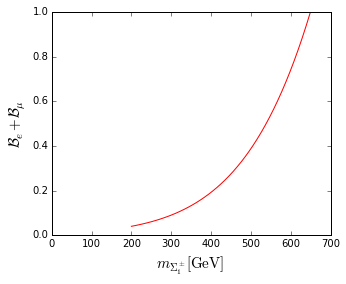

In [19]:
############
fig, ax = plt.subplots()
#xm=np.linspace(200,700,len(100))
xxm=np.linspace(200,700)

plt.plot(xxm,np.exp(z1dmee(xxm)),'r-',lw=1)

plt.ylabel(r'${\mathcal{B}_{e}} + {\mathcal{B}_{\mu}}$ '  ,size=15)
plt.xlabel(r'$  m_{\Sigma_1^\pm}[\rm GeV]$ '  ,size=15)
plt.ylim(0,1)
plt.xlim(0,700)
 
    
plt.savefig('excl.svg')    
print datetime.datetime.now()